In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("Census_Income_Dataset.csv")

In [3]:
data.head()

,age,workclass,fnlwgt,education,marital-status,occupation,handlers,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
data.shape

(32561, 15)

In [5]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'marital-status',
       'occupation', 'handlers', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
marital-status    32561 non-null int64
occupation        32561 non-null object
handlers          32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
#Check Duplicate
data.duplicated().sum()

24

In [3]:
#Removing Duplicates
census=data.drop_duplicates()

In [4]:
census.shape

(32537, 15)

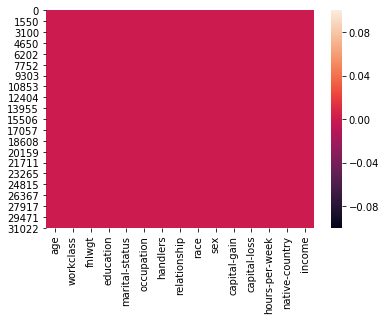

In [5]:
#To check missing value
sns.heatmap(census.isnull())

In [6]:
census.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
marital-status    0
occupation        0
handlers          0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [7]:
census.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
marital-status       16
occupation            7
handlers             15
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
native-country       42
income                2
dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [9]:
fea=['workclass','education', 'marital-status','occupation', 'handlers', 'relationship', 'race', 'sex','native-country']
for fea in census.columns:
    if census[fea].dtypes=="object":
        census[fea]=le.fit_transform(census[fea])

In [10]:
census.head(2)

,age,workclass,fnlwgt,education,marital-status,occupation,handlers,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0


In [11]:
census.income.unique()

array([0, 1], dtype=int64)

In [12]:
census.income = census.income.round()

In [13]:
census.income.unique()

array([0, 1], dtype=int64)

In [14]:
#Check Skewness
census.skew()

age                0.557663
workclass         -0.751598
fnlwgt             1.447703
education         -0.934160
marital-status    -0.309500
occupation        -0.012753
handlers           0.114586
relationship       0.786548
race              -2.435338
sex               -0.719449
capital-gain      11.949403
capital-loss       4.592702
hours-per-week     0.228759
native-country    -3.661128
income             1.211687
dtype: float64

In [15]:
for col in census.columns:
    if census.skew().loc[col] > 0.55:
        census[col]=np.log1p(census[col])
    if census.skew().loc[col] <= 0.55:
        census[col]=np.square(census[col])

In [16]:
census.skew()

age               0.064173
workclass         1.196993
fnlwgt           -0.670895
education         0.148813
marital-status    0.567468
occupation        1.163633
handlers          0.763913
relationship      0.870346
race             -2.120397
sex              -0.719449
capital-gain      3.094667
capital-loss      4.305701
hours-per-week    2.494981
native-country   -3.151969
income            1.211687
dtype: float64

Plotting Outliers

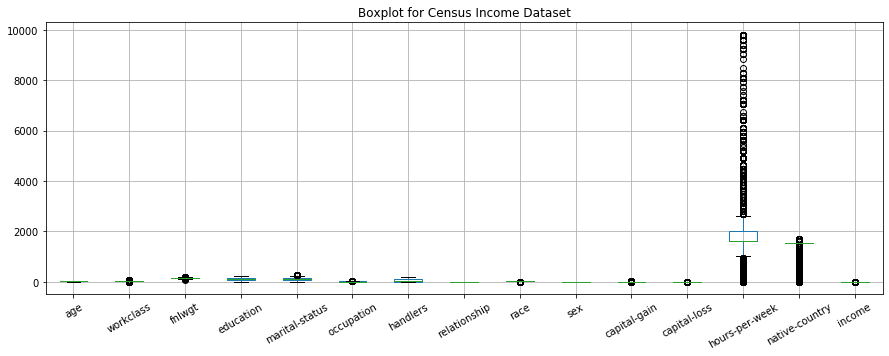

In [17]:
census.plot(kind='box',grid=True,title="Boxplot for Census Income Dataset",legend=True,rot=30,figsize=(15,5))

In [18]:
#check for Outlier
from scipy.stats import zscore
z_score=abs(zscore(census))
print(census.shape)
census=census.loc[(z_score < 3).all(axis=1)]
print(census.shape)

(32537, 15)
(24834, 15)


Exploring Data Variables

In [19]:
data.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
marital-status       16
occupation            7
handlers             15
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
native-country       42
income                2
dtype: int64

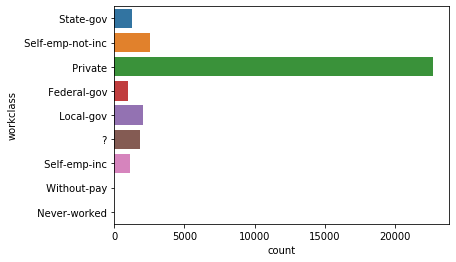

In [20]:
sns.countplot(y="workclass",data=data)

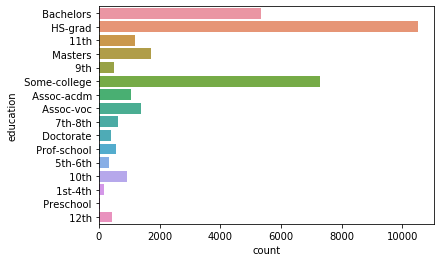

In [29]:
sns.countplot(y="education",data=data)

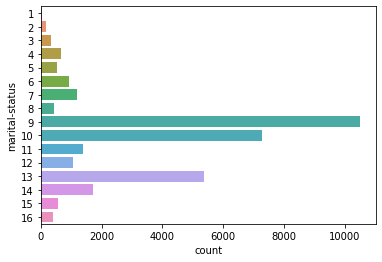

In [221]:
sns.countplot(y="marital-status",data=data)

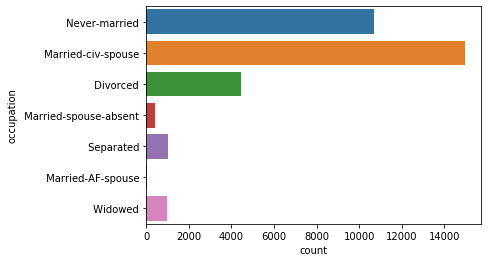

In [222]:
sns.countplot(y="occupation",data=data)

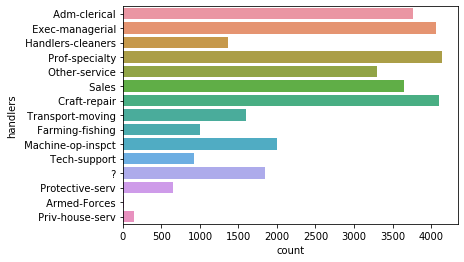

In [223]:
sns.countplot(y="handlers",data=data)

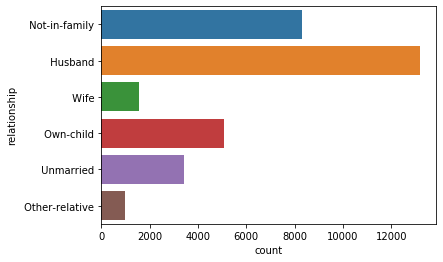

In [224]:
sns.countplot(y="relationship",data=data)

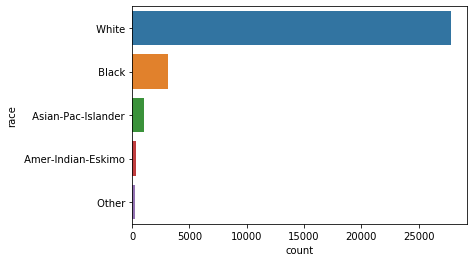

In [225]:
sns.countplot(y="race",data=data)

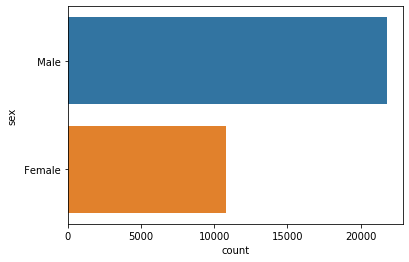

In [226]:
sns.countplot(y="sex",data=data)

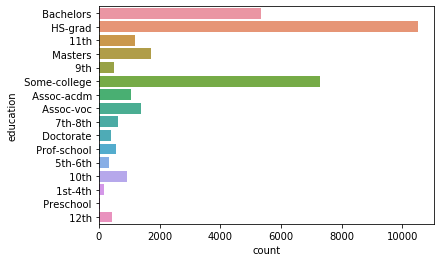

In [227]:
sns.countplot(y="education",data=data)

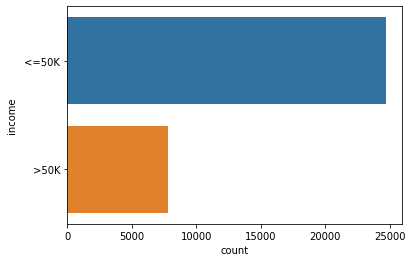

In [228]:
sns.countplot(y="income",data=data)

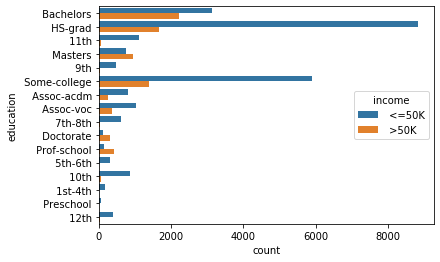

In [47]:
#Education vs Income
sns.countplot(y="education",hue="income",data=data)

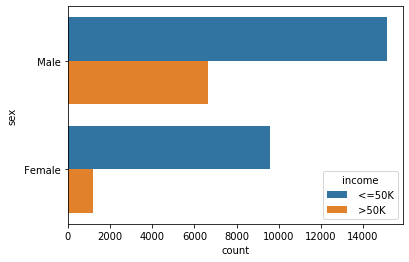

In [48]:
#Sex vs Income
sns.countplot(y="sex",hue="income",data=data)

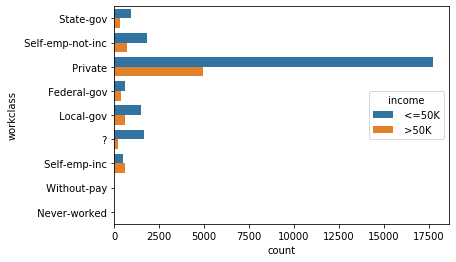

In [49]:
sns.countplot(y="workclass",hue="income",data=data)

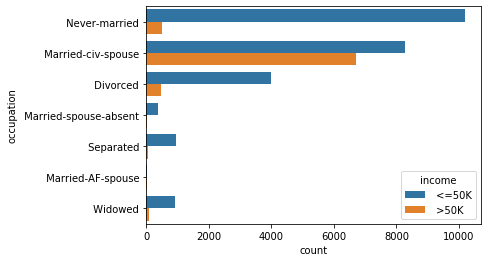

In [50]:
sns.countplot(y="occupation",hue="income",data=data)

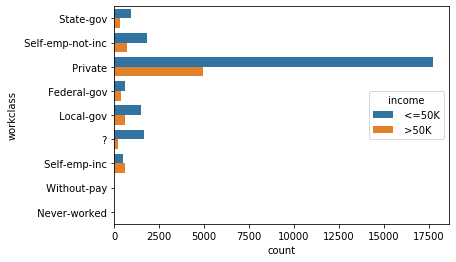

In [51]:
sns.countplot(y="workclass",hue="income",data=data)

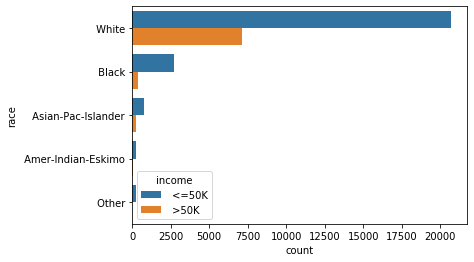

In [338]:
sns.countplot(y="race",hue="income",data=data)

Summary Statistics

In [30]:
census.describe()

,age,workclass,fnlwgt,education,marital-status,occupation,handlers,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
count,24834.000000,24834.000000,24834.000000,24834.000000,24834.000000,24834.000000,24834.000000,24834.000000,24834.000000,24834.000000,24834.000000,24834.000000,24834.000000,24834.000000,24834.000000
mean,12.956998,15.653177,144.232942,121.025046,104.499919,8.546871,60.253483,0.911318,14.363010,0.671982,0.155036,0.000203,1692.774624,1476.945720,0.133974
std,2.502769,7.988232,14.586565,69.737852,47.775615,7.012877,60.027717,1.042023,4.233179,0.469501,1.080860,0.032045,842.839390,187.698502,0.273711
min,8.354249,0.000000,99.634291,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,361.000000,0.000000
25%,10.862541,16.000000,136.466295,81.000000,81.000000,4.000000,9.000000,0.000000,16.000000,0.000000,0.000000,0.000000,1600.000000,1521.000000,0.000000
50%,13.038728,16.000000,146.422393,121.000000,100.000000,4.000000,36.000000,0.480453,16.000000,1.000000,0.000000,0.000000,1600.000000,1521.000000,0.000000
75%,14.823637,16.000000,153.303300,144.000000,121.000000,16.000000,100.000000,1.921812,16.000000,1.000000,0.000000,0.000000,2025.000000,1521.000000,0.000000
max,20.347853,36.000000,188.283356,225.000000,256.000000,25.000000,196.000000,3.210402,16.000000,1.000000,8.093768,5.049856,4900.000000,1681.000000,0.693147


In [31]:
#Correlation
census.corr()

,age,workclass,fnlwgt,education,marital-status,occupation,handlers,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
age,1.000000,0.080348,-0.060944,-0.036101,0.090035,-0.496813,-0.003584,-0.310093,0.016205,0.149044,0.035666,-0.004103,0.160870,0.022726,0.264275
workclass,0.080348,1.000000,-0.031288,-0.011953,0.004107,-0.077654,0.111648,-0.115796,0.076057,0.123538,0.014975,0.000276,0.155236,-0.011374,0.034478
fnlwgt,-0.060944,-0.031288,1.000000,-0.017479,-0.039055,0.045042,-0.007244,0.018274,-0.069789,0.013274,-0.008986,-0.001602,-0.041225,-0.094084,-0.007654
education,-0.036101,-0.011953,-0.017479,1.000000,0.161612,0.003443,-0.017347,0.020704,0.004516,-0.049250,-0.008829,-0.011013,0.018468,0.093515,0.037119
marital-status,0.090035,0.004107,-0.039055,0.161612,1.000000,-0.049876,0.105517,-0.094848,0.032062,-0.004163,-0.022761,-0.009099,0.156907,0.099883,0.313635
occupation,-0.496813,-0.077654,0.045042,0.003443,-0.049876,1.000000,-0.003026,0.286562,-0.112894,-0.179164,-0.019485,0.006744,-0.197487,-0.025533,-0.274121
handlers,-0.003584,0.111648,-0.007244,-0.017347,0.105517,-0.003026,1.000000,-0.062387,0.011438,0.052921,-0.008522,-0.001190,0.064631,0.026313,0.056650
relationship,-0.310093,-0.115796,0.018274,0.020704,-0.094848,0.286562,-0.062387,1.000000,-0.127843,-0.554466,-0.012584,-0.002624,-0.257404,-0.000364,-0.223510
race,0.016205,0.076057,-0.069789,0.004516,0.032062,-0.112894,0.011438,-0.127843,1.000000,0.108278,0.007574,0.002454,0.066904,0.157780,0.072524
sex,0.149044,0.123538,0.013274,-0.049250,-0.004163,-0.179164,0.052921,-0.554466,0.108278,1.000000,0.013422,-0.009083,0.221424,-0.020478,0.193852


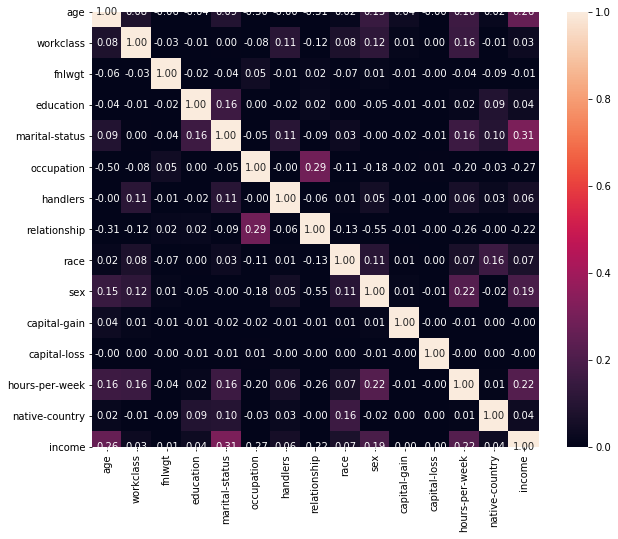

In [22]:
#showing the corelation with a heatmap
plt.figure(figsize=(10,8))
sns.heatmap(census.corr(),annot=True,fmt='.2f',vmax=1,vmin=0)
plt.show()

Features and Target Value

In [21]:
x=census.drop("income",axis=1)
y=census["income"]

In [22]:
x.head(2)

,age,workclass,fnlwgt,education,marital-status,occupation,handlers,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
1,15.459253,36,128.376783,81,169,4,16,0.000000,16,1,0.0,0.0,169,1521
2,13.421684,16,150.832739,121,81,0,36,0.480453,16,1,0.0,0.0,1600,1521


In [23]:
y.head(2)

1    0.0
2    0.0
Name: income, dtype: float64

In [24]:
y=y.round().astype(int)
y.unique()

array([0, 1], dtype=int64)

In [25]:
y=np.array(y)
y=y.reshape(-1,1)
y.shape

(24834, 1)

Standardisation

In [26]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

x=sc.fit_transform(x)
x

array([[ 0.99981491,  2.54715083, -1.08706045, ..., -0.00634579,
        -1.80794268,  0.23471241],
       [ 0.18567256,  0.0434176 ,  0.45246635, ..., -0.00634579,
        -0.11007612,  0.23471241],
       [ 1.18071459,  0.0434176 ,  0.59569025, ..., -0.00634579,
        -0.11007612,  0.23471241],
       ...,
       [-0.74055919,  0.0434176 ,  0.75201278, ..., -0.00634579,
        -0.29516849,  0.23471241],
       [ 0.3330857 ,  0.0434176 , -0.10275334, ..., -0.00634579,
        -0.11007612,  0.23471241],
       [-1.24891164,  0.0434176 ,  0.33844428, ..., -0.00634579,
        -1.53386359,  0.23471241]])

Spilt Train and Test

In [27]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict,GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,f1_score
from sklearn.preprocessing import StandardScaler 

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve,roc_auc_score,auc

In [28]:
#create best random_state
def rst(mod,x,y):
    max_r=0
    for rn_state in range (25,150):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=rn_state)
        mod.fit(x_train,y_train)
        pred=mod.predict(x_test)
        acs=accuracy_score(pred,y_test)
        f1=f1_score(y_test,pred)
        cnf=confusion_matrix(y_test,pred)
        clr=classification_report(y_test,pred)
        
        fpr,tpr,thresholds=roc_curve(y_test,pred)
        roc_auc=auc(fpr,tpr)

        if acs > max_r:
            max_r=acs
            random_state=rn_state
    print("random_state for mod"," is ",random_state,"which gives accuracy score of: ",max_r)
    #print('f1_score: ', f1)
    print('confusion matrix: ',cnf)
    print('classification report: ',clr)
    print("fpr: ",fpr)
    print("tpr: ",tpr)
    print("thresholds: ",thresholds)
    print("roc_auc: ",roc_auc)
    print()
    print('prediction: ',pred)
     

    plt.plot([0,1],[0,1],color='red',linestyle="dashdot")
    plt.plot(fpr,tpr,label="AUC= %0.4f" % roc_auc)
    plt.legend(loc='best',fontsize='medium',shadow=True)
    plt.xlabel("FPR")
    plt.ylabel('TPR')
    plt.title('RECEIVER OPERATING CHARACTERISTICS CURVE',size=15,weight='bold',loc='right')
    plt.show()
    
    return random_state

Logistic Regression

random_state for mod  is  34 which gives accuracy score of:  0.8362635887800295
confusion matrix:  [[5758  261]
 [ 982  450]]
classification report:                precision    recall  f1-score   support

           0       0.85      0.96      0.90      6019
           1       0.63      0.31      0.42      1432

    accuracy                           0.83      7451
   macro avg       0.74      0.64      0.66      7451
weighted avg       0.81      0.83      0.81      7451

fpr:  [0.         0.04336268 1.        ]
tpr:  [0.         0.31424581 1.        ]
thresholds:  [2 1 0]
roc_auc:  0.6354415626122494

prediction:  [0 0 0 ... 0 0 0]


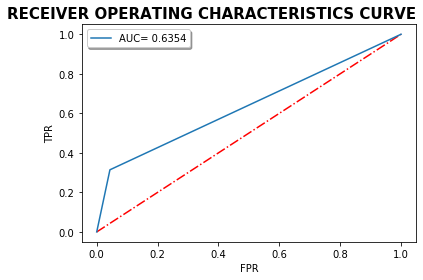

In [44]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver="lbfgs")
lr_g=rst(lr,x,y)

In [45]:
#Cross Validation
accuracy_score_1=cross_val_score(lr,x,y,scoring='accuracy',cv=10).mean()
accuracy_score_1

0.8285822984377503

DecisionTree

In [46]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt_param={'criterion':['gini','entropy'],'max_depth':range(5,10)}
dt_g=GridSearchCV(dt,dt_param,cv=10)
dt_g.fit(x,y)
dt_g.best_params_

{'criterion': 'entropy', 'max_depth': 5}

random_state for mod  is  34 which gives accuracy score of:  0.8542477519796
confusion matrix:  [[5780  239]
 [ 879  553]]
classification report:                precision    recall  f1-score   support

           0       0.87      0.96      0.91      6019
           1       0.70      0.39      0.50      1432

    accuracy                           0.85      7451
   macro avg       0.78      0.67      0.70      7451
weighted avg       0.84      0.85      0.83      7451

fpr:  [0.         0.03970759 1.        ]
tpr:  [0.         0.38617318 1.        ]
thresholds:  [2 1 0]
roc_auc:  0.6732327958670913

prediction:  [0 0 0 ... 0 0 0]


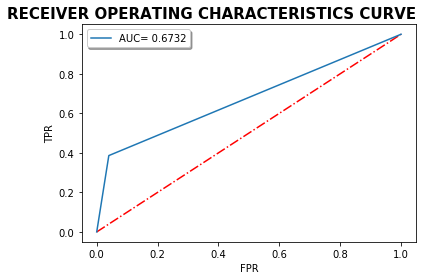

In [47]:
dt=DecisionTreeClassifier(criterion='entropy',max_depth=5)
dtc=rst(dt,x,y)

In [48]:
#Cross Validation
accuracy_score_3=cross_val_score(dt,x,y,scoring='accuracy',cv=10).mean()
accuracy_score_3

0.8452531481384202

GaussianNB

random_state for mod  is  51 which gives accuracy score of:  0.7741242786203194
confusion matrix:  [[1149 4870]
 [  15 1417]]
classification report:                precision    recall  f1-score   support

           0       0.99      0.19      0.32      6019
           1       0.23      0.99      0.37      1432

    accuracy                           0.34      7451
   macro avg       0.61      0.59      0.34      7451
weighted avg       0.84      0.34      0.33      7451

fpr:  [0.        0.8091045 1.       ]
tpr:  [0.         0.98952514 1.        ]
thresholds:  [2 1 0]
roc_auc:  0.5902103186278832

prediction:  [1 1 1 ... 1 1 1]


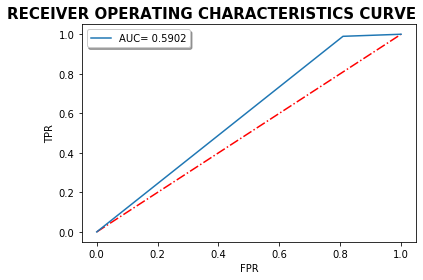

In [49]:
nb=GaussianNB()
gnb=rst(nb,x,y)

In [74]:
#Cross Validation
accuracy_score_4=cross_val_score(nb,x,y,scoring='accuracy',cv=5).mean()
accuracy_score_4

0.42594485667426757

SVC

In [ ]:
sv=SVC()
sv_param={'kernel':('rbf','linear','poly'),'degree':range(3,8)}
sv_g=GridSearchCV(sv,sv_param,cv=15)
sv_g.fit(x,y)
sv_g.best_params_

In [ ]:
sv=SVC()
sv_param={'kernel':('rbf','linear','poly'),'degree':range(5,8)}
sv_g=GridSearchCV(sv,sv_param,cv=15)
sv_g.fit(x,y)
sv_g.best_params_

Gradient Boosting

In [79]:
gb=GradientBoostingClassifier()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=85)

gb_param= {"learning_rate": [0.0001,0.025,0.1,1.0], "n_estimators":[250,500,750,1000]}

gb_g= GridSearchCV(gb,gb_param,cv=15)
gb_g.fit(x_train,y_train)
print("best parameters:", gb_g.best_params_)
print("\n best score:",gb_g.best_score_)

best parameters: {'learning_rate': 0.1, 'n_estimators': 250}

 best score: 0.8568141287464764


random_state for mod  is  112 which gives accuracy score of:  0.8699503422359415
confusion matrix:  [[5681  338]
 [ 686  746]]
classification report:                precision    recall  f1-score   support

           0       0.89      0.94      0.92      6019
           1       0.69      0.52      0.59      1432

    accuracy                           0.86      7451
   macro avg       0.79      0.73      0.76      7451
weighted avg       0.85      0.86      0.85      7451

fpr:  [0.         0.05615551 1.        ]
tpr:  [0.         0.52094972 1.        ]
thresholds:  [2 1 0]
roc_auc:  0.732397106555498

prediction:  [0 0 1 ... 0 0 0]


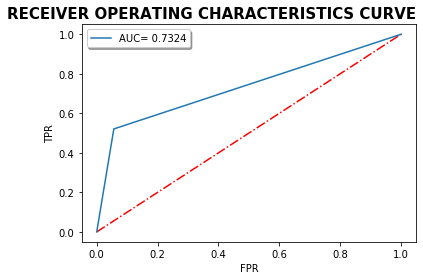

In [80]:
gb=GradientBoostingClassifier(learning_rate=0.1, n_estimators= 250)
gbc=rst(gb,x,y)

In [82]:
#Cross Validation
accuracy_score_6=cross_val_score(gb,x,y,scoring='accuracy',cv=15).mean()
accuracy_score_6

0.8579778011296465

In [ ]:
import joblib
joblib.dump(gb,"Gradient Boosting Classifier for Census Income dataset.pkl")